# Movie Genre Classification

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## Loading Data And Analyzing it

In [4]:
# Load data
def load_data(path):
    # read data from .txt file and assign names to columns
    data = pd.read_csv(path, sep=":::", names=["ID", "Title", "Genre", "Description"], engine="python")
    # We don't need ID, so drop this column
    data.drop(columns=["ID"], inplace=True)
    return data


# Import the train data 
df = load_data("data/train_data.txt")

# Get to know the data
df.shape

(54214, 3)

In [5]:
# Let's have a look how our data looks like
df.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
# Let's know little bit more about the data
df.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [7]:
# Check for null values
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
# so there is no null data at all present for this dataset

In [13]:
# all the unique genres and its count
genres = df['Genre'].value_counts()
print(genres)

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


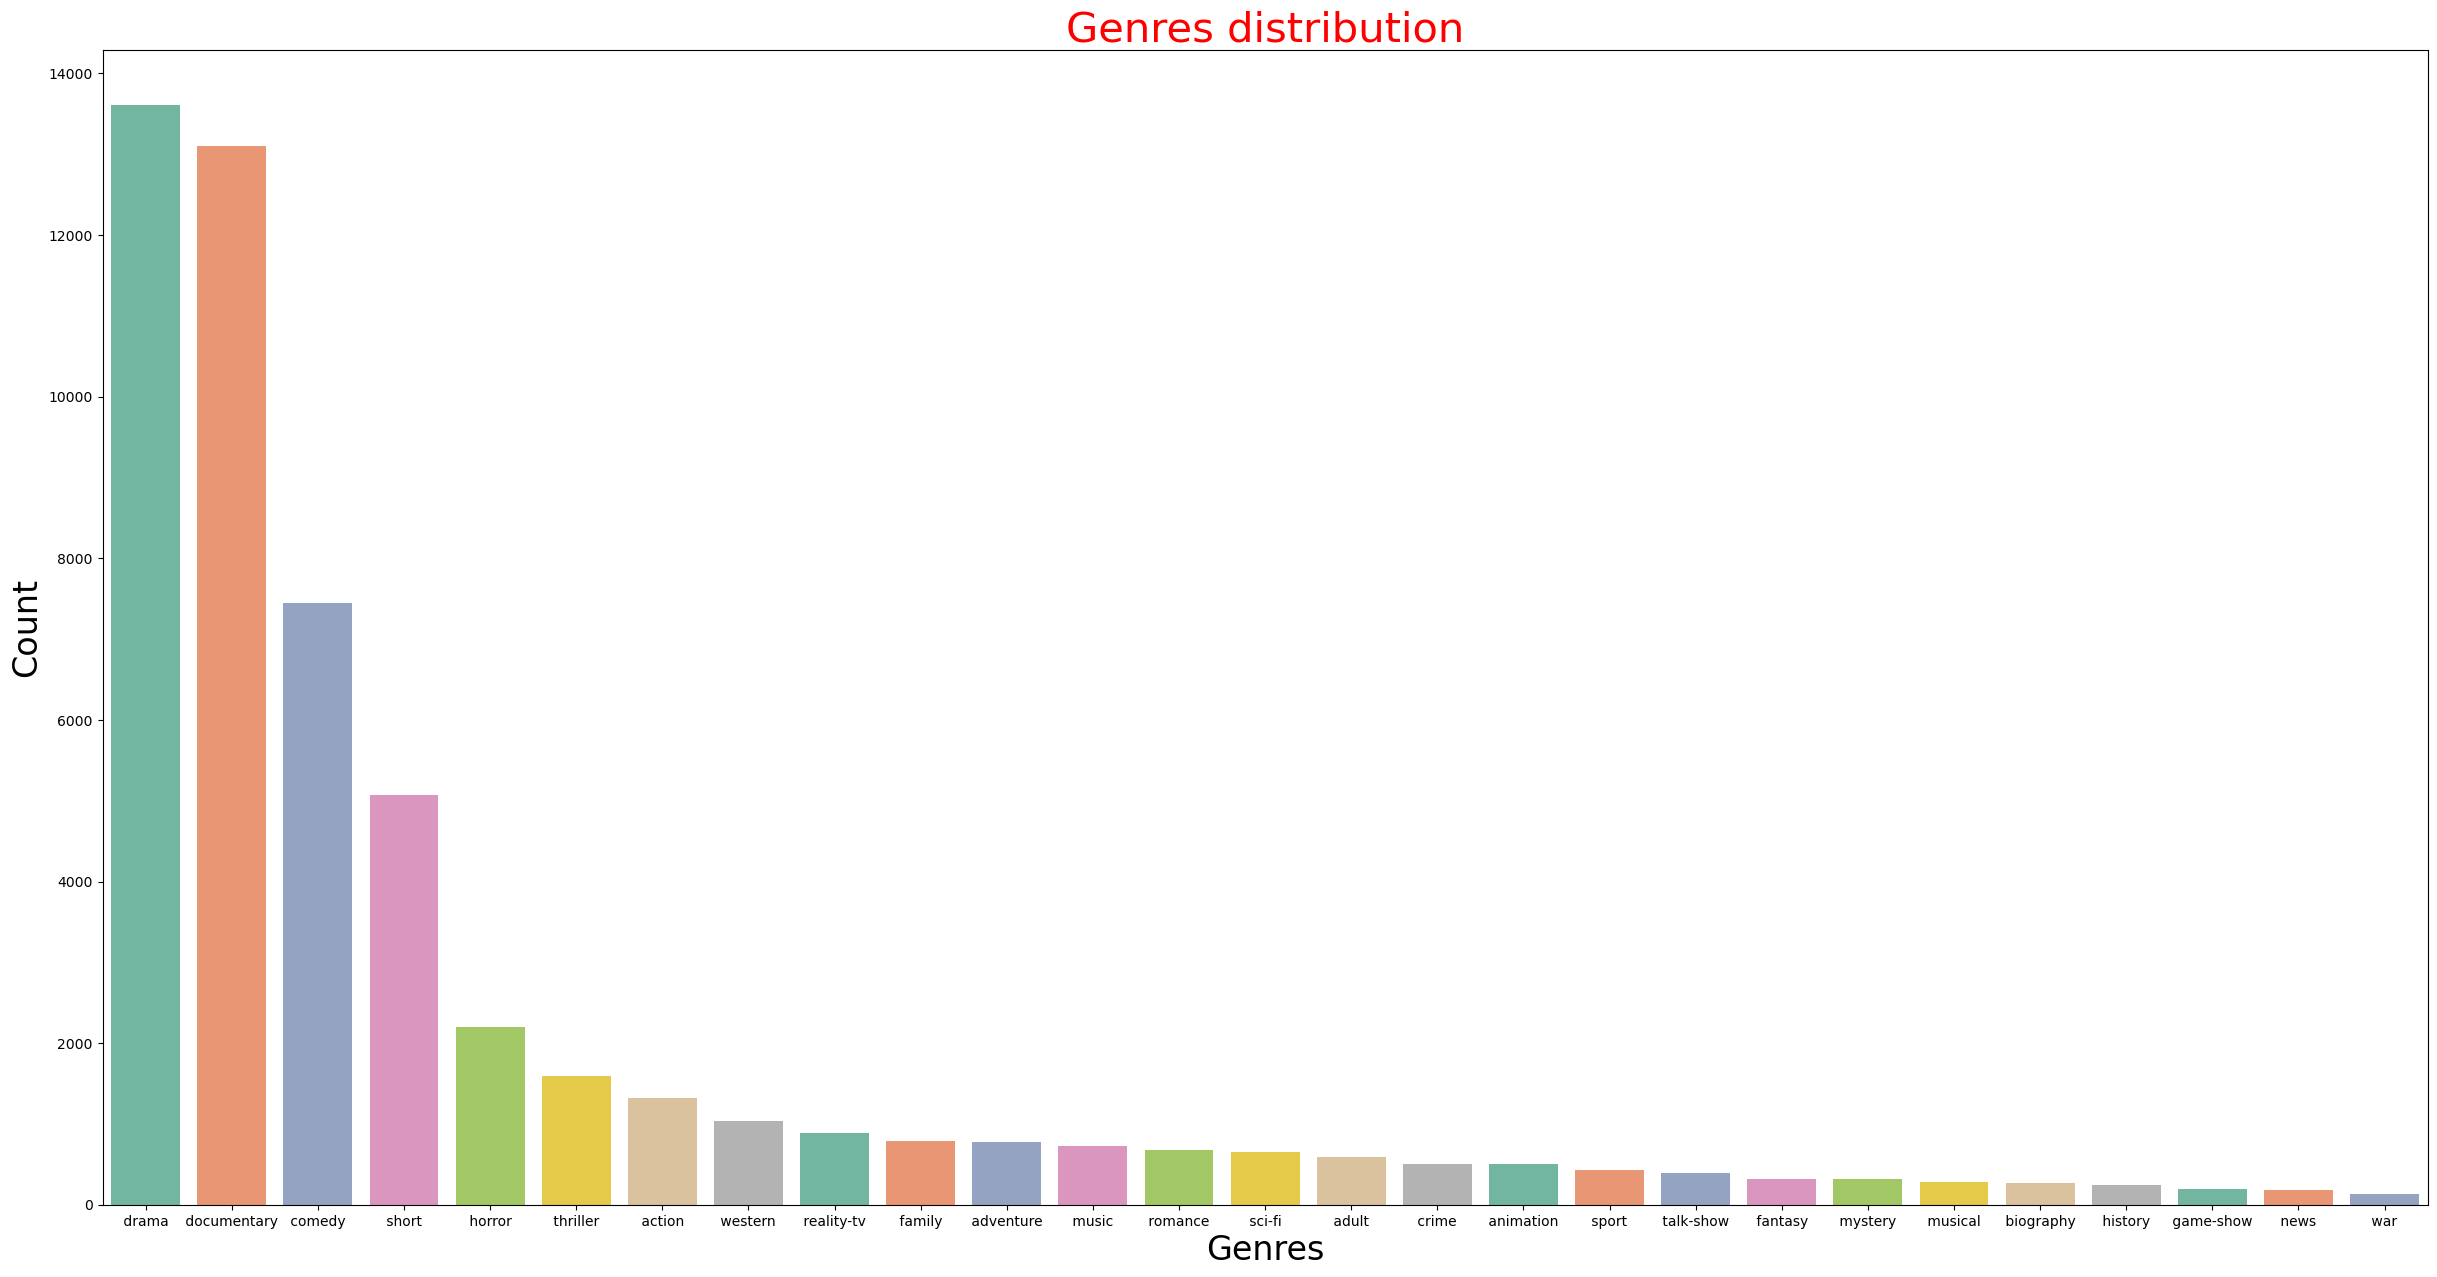

In [16]:
# Bar plot of genres and their count

plt.figure(figsize=(30, 15))
sns.barplot(x=genres.index, y=genres, palette="Set2")
plt.title("Genres distribution", fontsize=30, c='r')
plt.xlabel("Genres", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.show()

## Data Preprocessing

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [18]:
vectorizer.get_stop_words()

In [20]:
# Let's Try to see all the tokens from first few description

desc = df['Description'][:5]
type(desc)


0     Listening in to a conversation between his do...
1     A brother and sister with a past incestuous r...
2     As the bus empties the students for their fie...
3     To help their unemployed father make ends mee...
4     The film's title refers not only to the un-re...
Name: Description, dtype: object

In [23]:
# Generating tokens related to it
tokens = vectorizer.fit_transform(desc)

vectorizer.get_feature_names_out()

array(['10', '11', '2001', 'about', 'acquisition', 'across', 'addict',
       'admits', 'after', 'alertness', 'allow', 'also', 'an', 'and',
       'angry', 'another', 'anthropologist', 'anxiety', 'anyone',
       'approaches', 'are', 'arranges', 'arrested', 'artists', 'as', 'at',
       'average', 'away', 'bacon', 'bails', 'be', 'becomes', 'between',
       'blue', 'bodies', 'body', 'bones', 'both', 'brother', 'bus', 'but',
       'by', 'can', 'cause', 'charm', 'childhood', 'chinatown',
       'christmas', 'close', 'coeds', 'company', 'condition',
       'connections', 'conscious', 'conspiracy', 'conversation', 'corn',
       'country', 'couple', 'courage', 'curator', 'current', 'dance',
       'den', 'departs', 'dinner', 'doctor', 'does', 'dreams', 'drift',
       'drug', 'during', 'ease', 'edith', 'education', 'effect',
       'einstein', 'eligible', 'emotion', 'empathy', 'empties', 'ends',
       'enjoys', 'ensuing', 'erotic', 'even', 'everyone', 'examines',
       'except', 'experi

In [24]:
print(vectorizer.vocabulary_)

{'listening': 151, 'in': 134, 'to': 258, 'conversation': 55, 'between': 32, 'his': 126, 'doctor': 66, 'and': 13, 'parents': 191, '10': 0, 'year': 289, 'old': 180, 'oscar': 186, 'learns': 148, 'what': 275, 'nobody': 173, 'has': 116, 'the': 250, 'courage': 59, 'tell': 244, 'him': 124, 'he': 118, 'only': 183, 'few': 97, 'weeks': 274, 'live': 153, 'furious': 108, 'refuses': 210, 'speak': 231, 'anyone': 18, 'except': 88, 'straight': 234, 'talking': 242, 'rose': 216, 'lady': 146, 'pink': 197, 'meets': 160, 'on': 181, 'hospital': 128, 'stairs': 232, 'as': 24, 'christmas': 47, 'approaches': 19, 'uses': 269, 'her': 122, 'fantastical': 94, 'experiences': 89, 'professional': 202, 'wrestler': 287, 'imagination': 130, 'wit': 282, 'charm': 44, 'allow': 10, 'life': 150, 'love': 154, 'full': 107, 'company': 50, 'of': 176, 'friends': 106, 'pop': 198, 'corn': 56, 'einstein': 76, 'bacon': 28, 'childhood': 45, 'sweetheart': 240, 'peggy': 193, 'blue': 33, 'brother': 38, 'sister': 226, 'with': 283, 'past': 

In [26]:
# downloading stopwords
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deves\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
# As we are going see lots of stop words in this five description only lets try to remove them
# all the stop words of english in nltk
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# data before cleaning stopwords

print(desc[0])

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


In [29]:
# data after cleaning stopwords

clean_desc = [word for word in desc[0].split() if word.lower() not in stop_words]
clean_desc = ' '.join(clean_desc)
print(clean_desc)

Listening conversation doctor parents, 10-year-old Oscar learns nobody courage tell him. weeks live. Furious, refuses speak anyone except straight-talking Rose, lady pink meets hospital stairs. Christmas approaches, Rose uses fantastical experiences professional wrestler, imagination, wit charm allow Oscar live life love full, company friends Pop Corn, Einstein, Bacon childhood sweetheart Peggy Blue.


In [30]:
# Now its turn to clean all the description of it along with these numbers

def clean_desc(desc):
    # converting lower case to all
    desc = desc.lower()
    # removing numbers, symbols and all except alphabets
    desc = re.sub(r'[^a-zA-Z\s]+', '', desc).strip()
    # removing stop words
    stop_words = set(stopwords.words('english'))
    desc = [word for word in desc.split() if word.lower() not in stop_words]
    desc = ' '.join(desc)

    return desc

In [31]:
df['Clean Description'] = df['Description'].apply(clean_desc)
df.head()

,Title,Genre,Description,Clean Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


## TF-IDF vectorizer

In [32]:
# let's again start with TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Learn Vocabulary and idf, return document-term matrix
X_train = vectorizer.fit_transform(df['Clean Description'])

In [33]:
X_train.shape

(54214, 146144)

In [35]:
y_train = df['Genre']
print(y_train.shape)
print(y_train)

(54214,)
0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: Genre, Length: 54214, dtype: object


## Getting the test data

In [36]:
test_data = load_data('data/test_data_solution.txt')
test_data.head()

,Title,Genre,Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [37]:
# Cleaning of this
test_data['Clean Description'] = test_data['Description'].apply(clean_desc)
test_data.head()

,Title,Genre,Description,Clean Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job especial...
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [39]:
# Transforming this test data
X_test = vectorizer.transform(test_data['Clean Description'])
print(X_test.shape)

(54200, 146144)


In [40]:
y_test = test_data['Genre']
print(y_test)

0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: Genre, Length: 54200, dtype: object


## Naive Bayes Classifier

### Train

In [42]:
model = MultinomialNB()

In [43]:
model.fit(X_train, y_train)

MultinomialNB()

### Test

In [45]:
# Let's Test the model with test data
y_pred = model.predict(X_test)

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {(accuracy*100) :.2f}%")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy = 44.36%
               precision    recall  f1-score   support

      action        1.00      0.00      0.00      1314
       adult        1.00      0.00      0.00       590
   adventure        1.00      0.00      0.00       775
   animation        1.00      0.00      0.00       498
   biography        1.00      0.00      0.00       264
      comedy        0.73      0.04      0.07      7446
       crime        1.00      0.00      0.00       505
 documentary        0.53      0.90      0.67     13096
       drama        0.38      0.88      0.53     13612
      family        1.00      0.00      0.00       783
     fantasy        1.00      0.00      0.00       322
   game-show        1.00      0.00      0.00       193
     history        1.00      0.00      0.00       243
      horror        1.00      0.00      0.00      2204
       music        1.00      0.00      0.00       731
     musical        1.00      0.00      0.00       276
     mystery        1.00      0.00      0.00  

## Conclusion

#'Multinomial Naive Bayes' predicts the Genre of Movie with 44.36% accuracy.